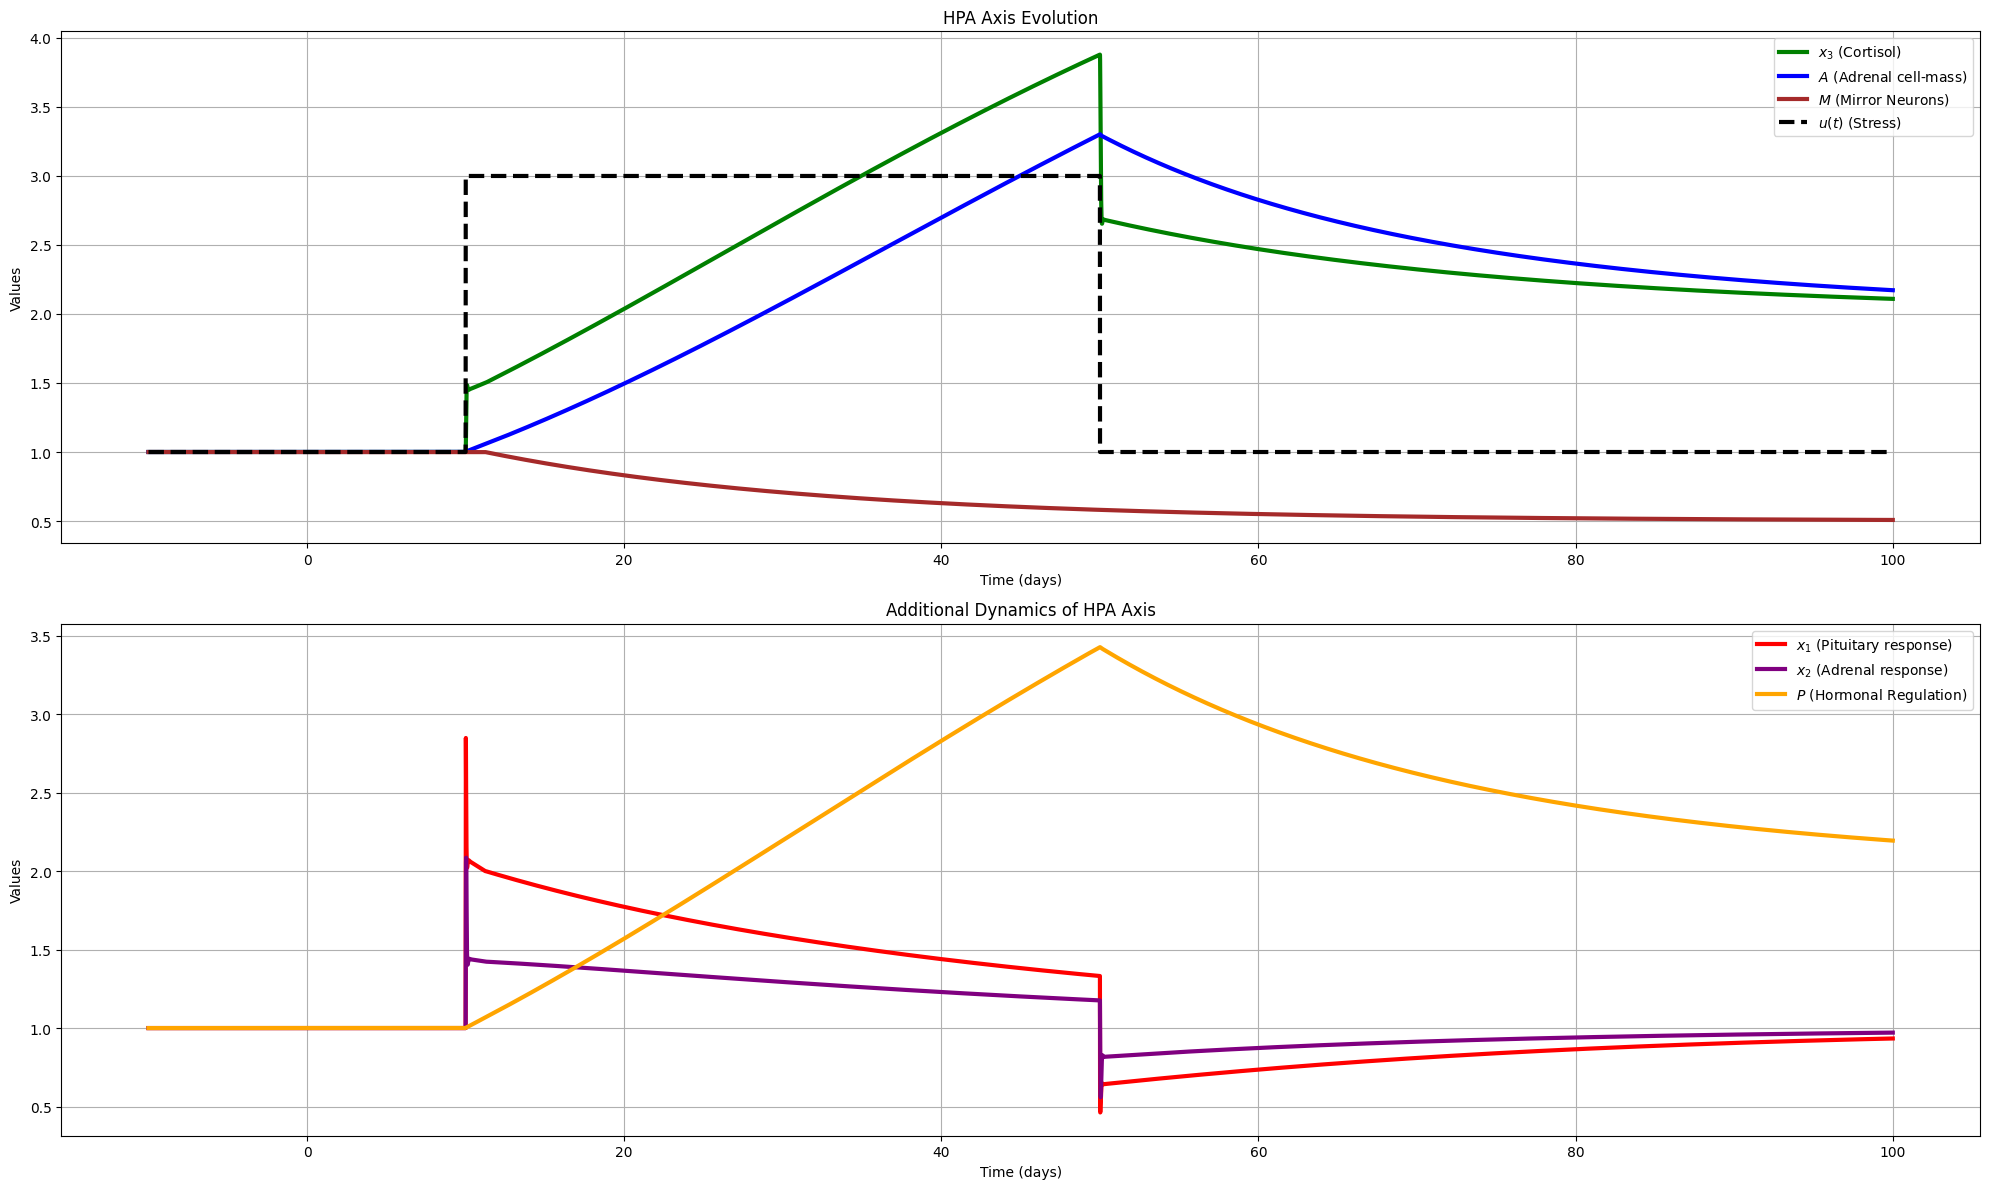

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams["font.family"] = "DejaVu Sans"  # Font settings

# Define parameters
q1, q2, q3 = 0.17 * 60 * 24, 0.035 * 60 * 24, 0.0086 * 60 * 24
alpha1, alpha2, alpha3 = 0.17 * 60 * 24, 0.035 * 60 * 24, 0.0086 * 60 * 24
ap, bp = 0.05, 0.05
am, bm = 0.047, 0.047
aa, ba = 0.1, 0.1
a, b = 1.0, 1.0
T = 1.5  # Threshold for the step function

# Define the step function for u
def u(t):
    return 3.0 if 10 <= t <= 50 else 1.0  # Stress period 40 days

# Define the system of equations
def system(y, t):
    x1, x2, x3, P, A, h = y
    epsilon = 1e-6  # Small constant to prevent division errors

    dx1_dt = q1 * (u(t) * 1 / (h * (x3 + epsilon))) - alpha1 * x1
    dx2_dt = q2 * (P * x1 / (x3 + epsilon)) - alpha2 * x2
    dx3_dt = q3 * A * x2 - alpha3 * x3
    dP_dt = P * (bp * x1 - ap) if abs(P) < 1e6 else 0  # Prevent overflow
    dA_dt = A * (ba * x2 - aa)
    dM_dt = am / (a + b * (x3 > T)) - bm * h

    return [dx1_dt, dx2_dt, dx3_dt, dP_dt, dA_dt, dM_dt]

# Initial conditions
M_0  = 1.0
x1_0 = ap / bp
x2_0 = aa / ba
x3_0 = q1 / (M_0 * alpha1 * x1_0)
P_0  = alpha2 * x2_0 * x3_0 / (q2 * x1_0)
A_0  = alpha3 * x3_0 / (q3 * x2_0)
y0   = [x1_0, x2_0, x3_0, P_0, A_0, M_0]

# Time span for simulation
final_day = 100
time = np.linspace(-10, final_day, final_day * 1000)  # Increased resolution

# Solve using odeint
solution = odeint(system, y0, time)

# Extract results
x1, x2, x3, P, A, M = solution.T

# Compute u(t) for plotting
u_values = np.array([u(ti) for ti in time])

# Plot results
plt.figure(figsize=(20, 12))

# Plot main system variables
plt.subplot(2, 1, 1)
plt.plot(time, x3, label=r'$x_3$ (Cortisol)', color='green', linewidth=3)
plt.plot(time, A, label=r'$A$ (Adrenal cell-mass)', color='blue', linewidth=3)
plt.plot(time, M, label=r'$M$ (Mirror Neurons)', color='brown', linewidth=3)
plt.plot(time, u_values, label=r'$u(t)$ (Stress)', color='black', linestyle='dashed', linewidth=3)
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.title('HPA Axis Evolution')
plt.legend()
plt.grid()

# Plot x1, x2, and P
plt.subplot(2, 1, 2)
plt.plot(time, x1, label=r'$x_1$ (Pituitary response)', color='red', linewidth=3)
plt.plot(time, x2, label=r'$x_2$ (Adrenal response)', color='purple', linewidth=3)
plt.plot(time, P, label=r'$P$ (Hormonal Regulation)', color='orange', linewidth=3)
plt.xlabel('Time (days)')
plt.ylabel('Values')
plt.title('Additional Dynamics of HPA Axis')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


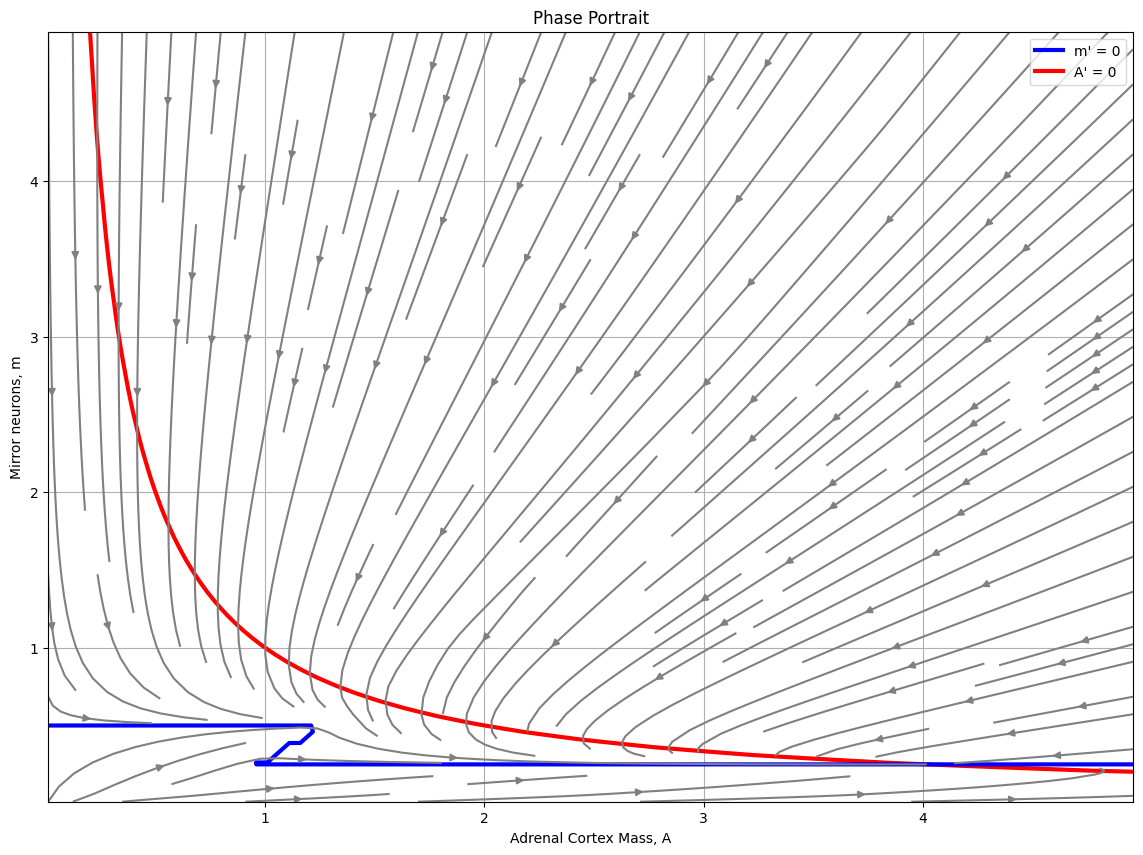

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib

# Define symbols
u = Symbol('u')
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
m = Symbol('m')
P = Symbol('P')
A = Symbol('A')
D=Symbol('D')

# Solve steady-state equations
stst = solve([u/(m*x3) - x1,
              x1*P/x3    - x2,
              x2*A       - x3],
             [x1, x2, x3])
fast_ss = stst[0]

# Function to plot dynamics
def plot_dynamics(fast_ss, uu=1, DD=0.5, aa=1, bb=1, TT=1.5, rnge=[0.01, 5], resolution=0.05):
    start = rnge[0]
    end = rnge[1]
    xA = np.arange(start, end, resolution)   # range for A
    xm = np.arange(start, end, resolution)   # range for m
    nA = xA.shape[0]
    nm = xm.shape[0]

    contA = np.zeros([nA, nm])
    contm = np.zeros([nA, nm])

    for iA in range(nA):
        for im in range(nm):
            [x1_ss, x2_ss, x3_ss] = [
                ss.subs({u: uu, D: DD, A: xA[iA], P: xA[iA], m: xm[im]})
                for ss in fast_ss
            ]
            contA[iA, im] = xA[iA] * x2_ss - xA[iA]
            contm[iA, im] = 1 * DD / (aa + bb * np.heaviside(float(x3_ss - TT), 0)) - xm[im]

    plt.figure(figsize=(14, 10))
    plt.contour(xA, xm, contA.T, levels=[0], colors='red', linewidths=3)   # A'=0
    plt.contour(xA, xm, contm.T, levels=[0], colors='blue', linewidths=3)   # m'=0
    plt.streamplot(xA, xm, contA.T, contm.T, color='gray', density=1.5)  # Reduced density

    # Labeling axes
    plt.xlabel("Adrenal Cortex Mass, A")
    plt.ylabel("Mirror neurons, m")
    plt.title("Phase Portrait")
    plt.grid(True)

    # Adding legend
    m_proxy = matplotlib.lines.Line2D([], [], color='blue', linewidth=3, label="m' = 0")
    A_proxy = matplotlib.lines.Line2D([], [], color='red', linewidth=3, label="A' = 0")
    plt.legend(handles=[m_proxy, A_proxy],loc="upper right")
    plt.show()

# Call the function with parameters
plot_dynamics(fast_ss, uu=1, TT=1.5)

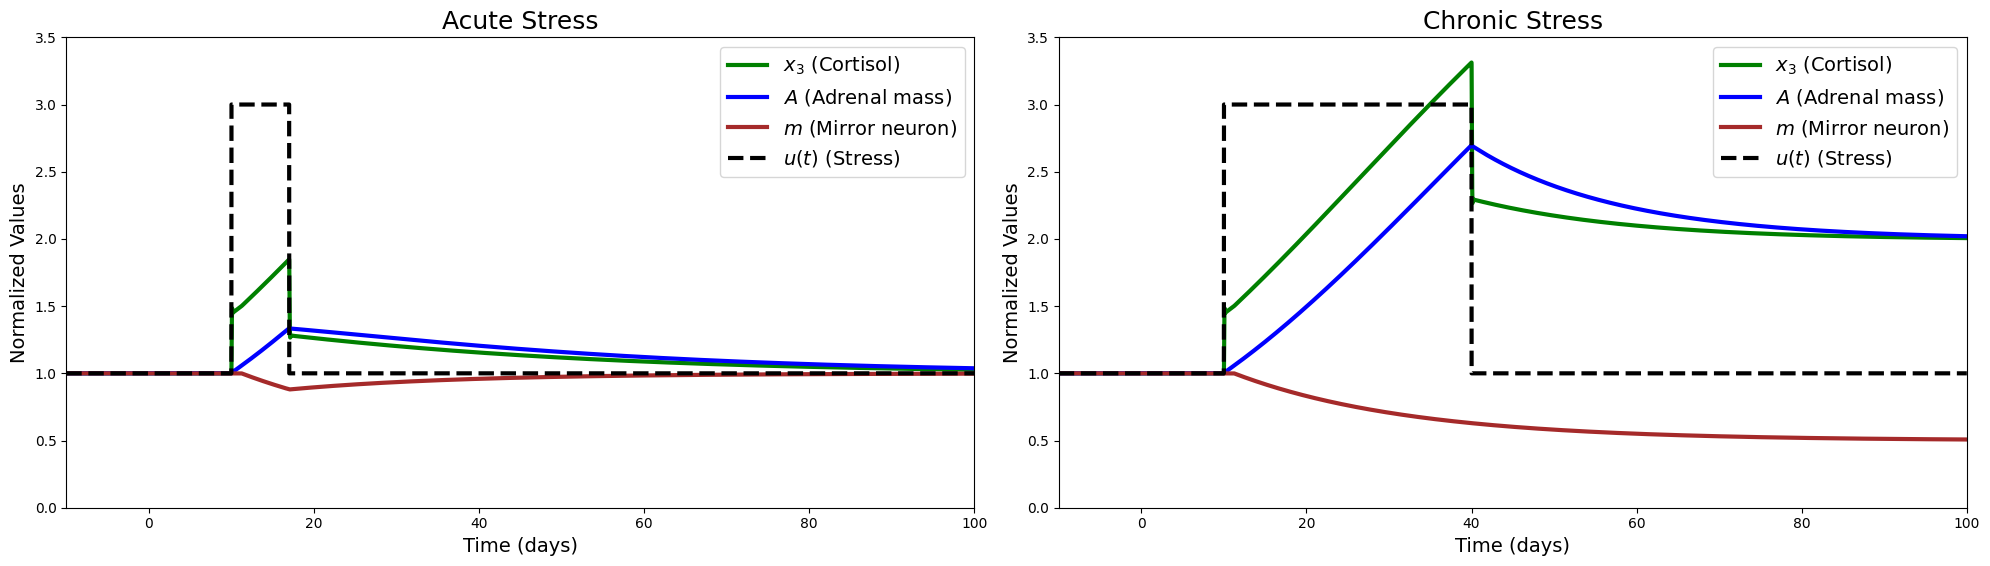

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"  # or another available font
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14

# Define parameters
q1, q2, q3 = 0.17 * 60 * 24, 0.035 * 60 * 24, 0.0086 * 60 * 24
alpha1, alpha2, alpha3 = q1, q2, q3
ap, bp = 0.05, 0.05
am, bm = 0.047, 0.047
aa, ba = 0.1, 0.1
a, b = 1.0, 1.0
T = 1.5  # Threshold for the step function

# Define different step functions for u(t)
def u_acute_stress(t):
    return 3.0 if 10 <= t <= 17 else 1.0

def u_chronic_stress(t):
    return 3.0 if 10 <= t <= 40 else 1.0

def u_acute_stress_reduction(t):
    return 0.2 if 10 <= t <= 17 else 1.0

def u_chronic_stress_reduction(t):
    return 0.2 if 10 <= t <= 40 else 1.0
# Define the system of equations
def system(y, t, u_func):
    x1, x2, x3, P, A, h = y
    epsilon = 1e-6  # Small constant to prevent division errors
    dx1_dt = q1 * (u_func(t) * 1 / (h * (x3 + epsilon))) - alpha1 * x1
    dx2_dt = q2 * (P * x1 / (x3 + epsilon)) - alpha2 * x2
    dx3_dt = q3 * A * x2 - alpha3 * x3
    dP_dt = P * (bp * x1 - ap)
    dA_dt = A * (ba * x2 - aa)
    dM_dt = am / (a + b * (x3 > T)) - bm * h

    return np.array([dx1_dt, dx2_dt, dx3_dt, dP_dt, dA_dt, dM_dt])

# Initial conditions
M_0  = 1.0
x1_0 = ap / bp
x2_0 = aa / ba
x3_0 = q1 / (M_0 * alpha1 * x1_0)
P_0  = alpha2 * x2_0 * x3_0 / (q2 * x1_0)
A_0  = alpha3 * x3_0 / (q3 * x2_0)
y0   = [x1_0, x2_0, x3_0, P_0, A_0, M_0]

# Time span for simulation
final_day = 100
time = np.linspace(-10, final_day, final_day * 300)
dt = time[1] - time[0]  # Time step

# RK4 method for solving ODEs
def rk4_step(y, t, dt, u_func):
    k1 = dt * system(y, t, u_func)
    k2 = dt * system(y + 0.5 * k1, t + 0.5 * dt, u_func)
    k3 = dt * system(y + 0.5 * k2, t + 0.5 * dt, u_func)
    k4 = dt * system(y + k3, t + dt, u_func)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Function to compute solution using RK4
def compute_solution(u_func, initial_conditions):
    solution = np.zeros((len(time), len(initial_conditions)))
    solution[0] = initial_conditions
    for i in range(1, len(time)):
        solution[i] = rk4_step(solution[i-1], time[i-1], dt, u_func)
    return solution.T

# Compute solutions for different scenarios
x1_acute, x2_acute, x3_acute, P_acute, A_acute, m_acute = compute_solution(u_acute_stress, y0)
x1_chronic, x2_chronic, x3_chronic, P_chronic, A_chronic, m_chronic = compute_solution(u_chronic_stress, y0)

# Use final state of chronic stress as initial state for bottom plots
y0_modified = np.array([x1_chronic[-1], x2_chronic[-1], x3_chronic[-1], P_chronic[-1], A_chronic[-1], m_chronic[-1]])

x1_acute_red, x2_acute_red, x3_acute_red, P_acute_red, A_acute_red, m_acute_red = compute_solution(u_acute_stress_reduction, y0_modified)
x1_chronic_red, x2_chronic_red, x3_chronic_red, P_chronic_red, A_chronic_red, m_chronic_red = compute_solution(u_chronic_stress_reduction, y0_modified)

# Plot results in two separate figures
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 6))
scenarios_fig1 = [
    (x3_acute, A_acute, m_acute, u_acute_stress, "Acute Stress", axes1[0]),
    (x3_chronic, A_chronic, m_chronic, u_chronic_stress, "Chronic Stress", axes1[1])
]

for x3, A, m, u_func, title, ax in scenarios_fig1:
    u_values = np.array([u_func(ti) for ti in time])
    ax.plot(time, x3, label=r'$x_3$ (Cortisol)', color='green', linewidth=3)
    ax.plot(time, A, label=r'$A$ (Adrenal mass)', color='blue', linewidth=3)
    ax.plot(time, m, label=r'$m$ (Mirror neuron)', color='brown', linewidth=3)
    ax.plot(time, u_values, label=r'$u(t)$ (Stress)', color='black', linestyle='dashed', linewidth=3)
    ax.set_title(title)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Normalized Values')
    ax.set_ylim(0, 3.5)
    ax.set_xlim(time[0], time[-1])
    ax.legend(loc='upper right')

fig1.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

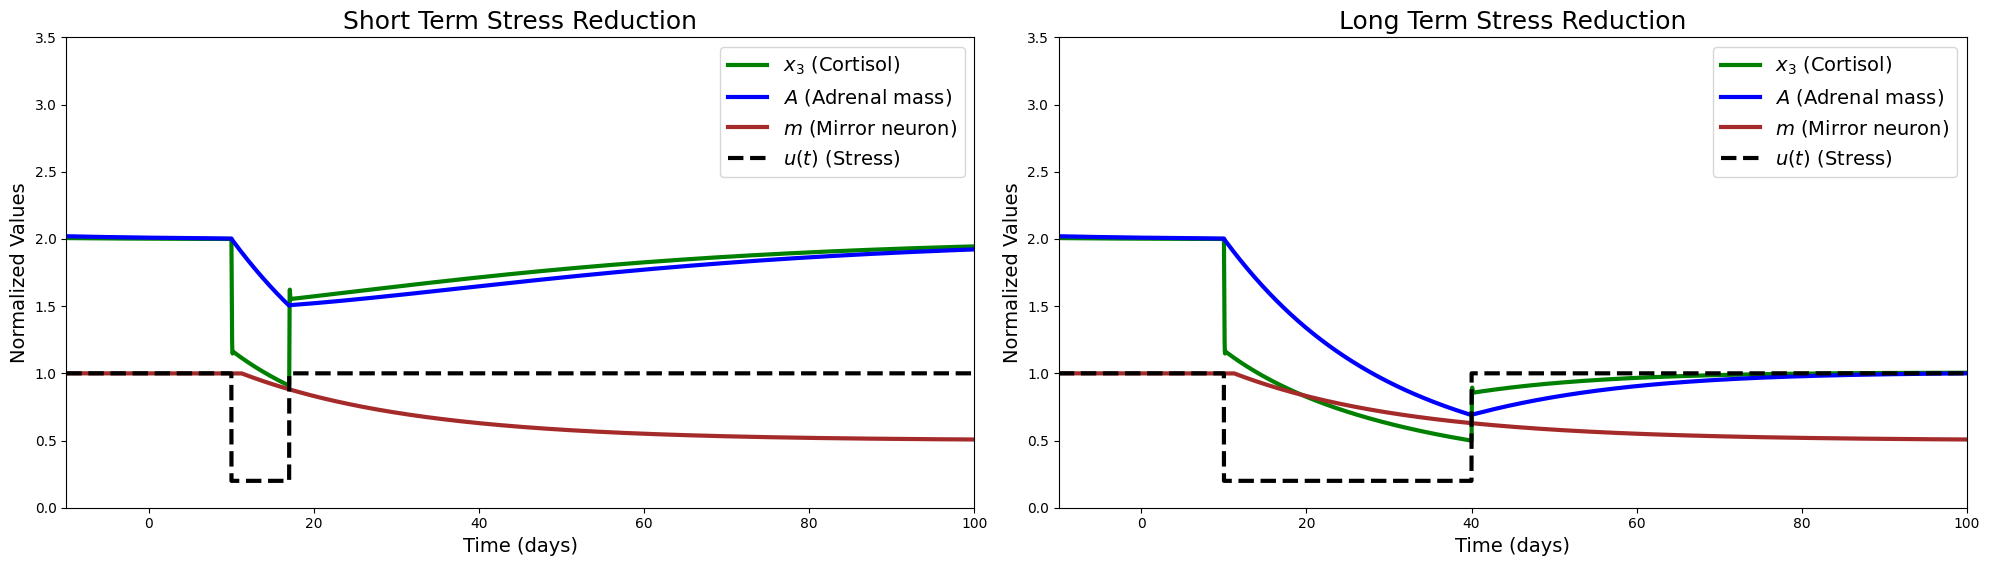

In [ ]:
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 6))
scenarios_fig2 = [
    (x3_acute_red, A_acute_red, m_acute_red, u_acute_stress_reduction, "Short Term Stress Reduction", axes2[0]),
    (x3_chronic_red, A_chronic_red, m_chronic_red, u_chronic_stress_reduction, "Long Term Stress Reduction", axes2[1])
]

for x3, A, h, u_func, title, ax in scenarios_fig2:
    u_values = np.array([u_func(ti) for ti in time])
    ax.plot(time, x3, label=r'$x_3$ (Cortisol)', color='green', linewidth=3)
    ax.plot(time, A, label=r'$A$ (Adrenal mass)', color='blue', linewidth=3)
    ax.plot(time, m, label=r'$m$ (Mirror neuron)', color='brown', linewidth=3)
    ax.plot(time, u_values, label=r'$u(t)$ (Stress)', color='black', linestyle='dashed', linewidth=3)
    ax.set_title(title)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Normalized Values')
    ax.set_ylim(0, 3.5)
    ax.set_xlim(time[0], time[-1])
    ax.legend(loc='upper right')

fig2.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-5-fcb1a2eac147>:22: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xA, xm, contA.T, levels=[0], colors='red', linewidths=3, label="A'=0")
<ipython-input-5-fcb1a2eac147>:23: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xA, xm, contm.T, levels=[0], colors='blue', linewidths=3, label="m'=0")


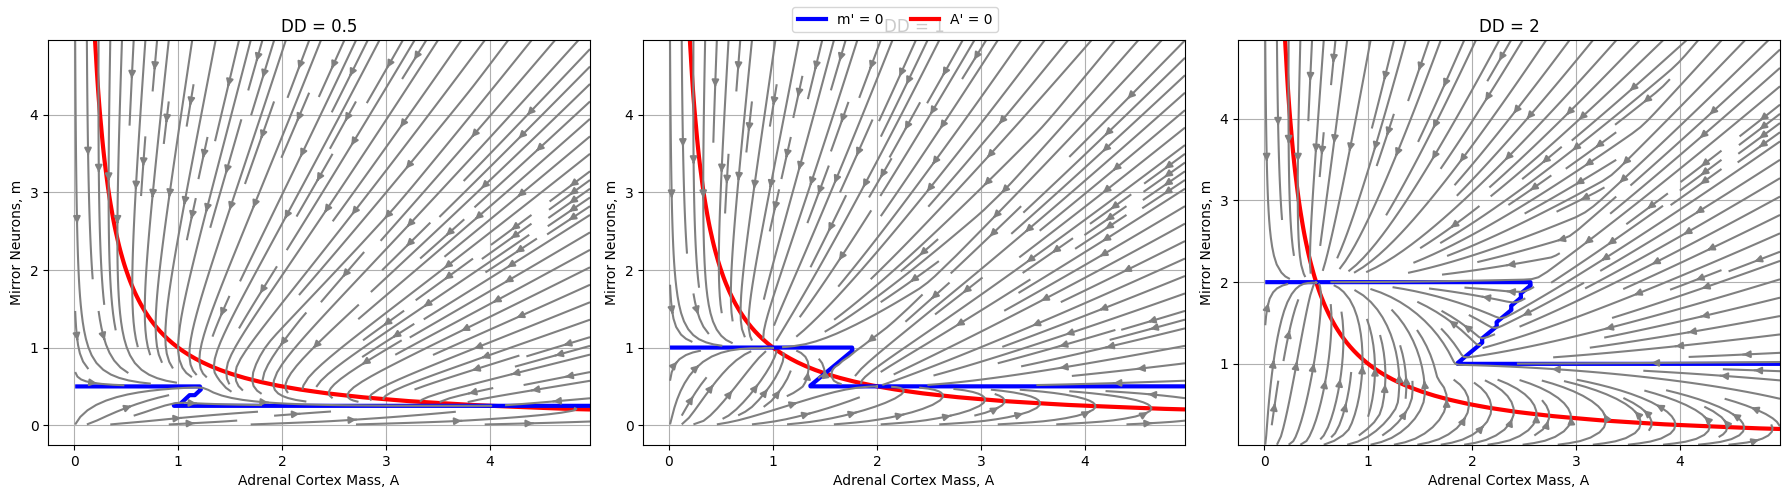

In [ ]:
# Modified plot_dynamics function to accept an axis
def plot_dynamics(ax, fast_ss, uu=1, DD=0.5, aa=1, bb=1, TT=1.5, rnge=[0.01, 5], resolution=0.05):
    start = rnge[0]
    end = rnge[1]
    xA = np.arange(start, end, resolution)  # range for A
    xm = np.arange(start, end, resolution)  # range for m
    nA = xA.shape[0]
    nm = xm.shape[0]

    contA = np.zeros((nA, nm))
    contm = np.zeros((nA, nm))

    for iA in range(nA):
        for im in range(nm):
            [x1_ss, x2_ss, x3_ss] = [
                ss.subs({u: uu, D: DD, A: xA[iA], P: xA[iA], m: xm[im]})
                for ss in fast_ss
            ]
            contA[iA, im] = xA[iA] * x2_ss - xA[iA]
            contm[iA, im] = 1 * DD / (aa + bb * np.heaviside(float(x3_ss - TT), 0)) - xm[im]

    ax.contour(xA, xm, contA.T, levels=[0], colors='red', linewidths=3, label="A'=0")
    ax.contour(xA, xm, contm.T, levels=[0], colors='blue', linewidths=3, label="m'=0")
    ax.streamplot(xA, xm, contA.T, contm.T, color='gray', density=1.5)

    ax.set_xlabel("Adrenal Cortex Mass, A")
    ax.set_ylabel("Mirror Neurons, m")
    ax.set_title(f"DD = {DD}")
    ax.grid(True)

# Create 3 side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

DD_values = [0.5, 1, 2]
for i, DD_val in enumerate(DD_values):
    plot_dynamics(axes[i], fast_ss, uu=1, DD=DD_val, TT=1.5)

# Add single legend
m_proxy = matplotlib.lines.Line2D([], [], color='blue', linewidth=3, label="m' = 0")
A_proxy = matplotlib.lines.Line2D([], [], color='red', linewidth=3, label="A' = 0")
fig.legend(handles=[m_proxy, A_proxy], loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


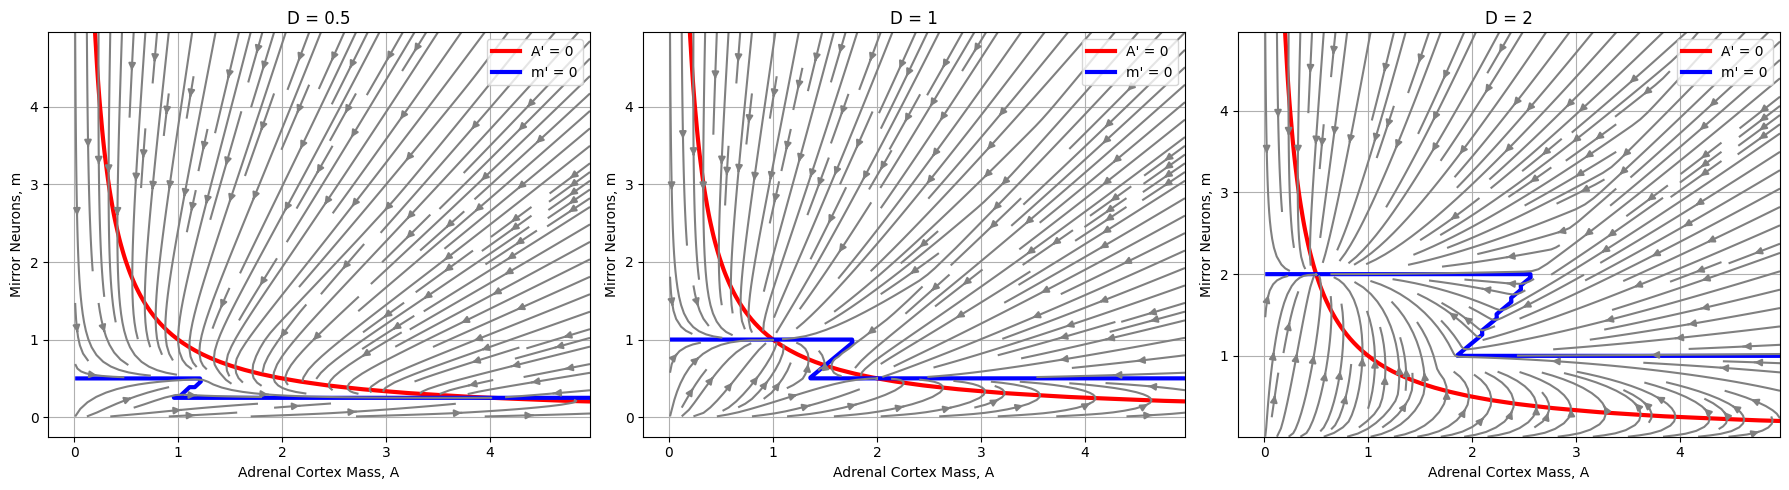

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dynamics(ax, fast_ss, uu=1, DD=0.5, aa=1, bb=1, TT=1.5, rnge=[0.01, 5], resolution=0.05):
    start = rnge[0]
    end = rnge[1]
    xA = np.arange(start, end, resolution)  # range for A
    xm = np.arange(start, end, resolution)  # range for m
    nA = xA.shape[0]
    nm = xm.shape[0]

    contA = np.zeros((nA, nm))
    contm = np.zeros((nA, nm))

    for iA in range(nA):
        for im in range(nm):
            [x1_ss, x2_ss, x3_ss] = [
                ss.subs({u: uu, D: DD, A: xA[iA], P: xA[iA], m: xm[im]})
                for ss in fast_ss
            ]
            contA[iA, im] = xA[iA] * x2_ss - xA[iA]
            contm[iA, im] = 1 * DD / (aa + bb * np.heaviside(float(x3_ss - TT), 0)) - xm[im]

    # Plotting nullclines
    A_null = ax.contour(xA, xm, contA.T, levels=[0], colors='red', linewidths=3)
    m_null = ax.contour(xA, xm, contm.T, levels=[0], colors='blue', linewidths=3)

    # Adding streamlines
    ax.streamplot(xA, xm, contA.T, contm.T, color='gray', density=1.5)

    ax.set_xlabel("Adrenal Cortex Mass, A")
    ax.set_ylabel("Mirror Neurons, m")
    ax.set_title(f"D = {DD}")
    ax.grid(True)

    # Creating a custom legend for each subplot
    # Using proxy artists for the legend
    A_proxy = plt.Line2D([], [], color='red', linewidth=3, label="A' = 0")
    m_proxy = plt.Line2D([], [], color='blue', linewidth=3, label="m' = 0")
    ax.legend(handles=[A_proxy, m_proxy], loc='upper right')

# Create 3 side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

DD_values = [0.5, 1, 2]
for i, DD_val in enumerate(DD_values):
    plot_dynamics(axes[i], fast_ss, uu=1, DD=DD_val, TT=1.5)

plt.tight_layout()
plt.show()
